# Quantify Bleed (Data Creation)

In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
import librosa as lb
import soundfile as sf
from pydub import AudioSegment

In [42]:
path = '/Users/rajeshr/Desktop/QuantifyBleed/'

In [43]:
violin, v_fs = sf.read(path+'violin.wav')
mridangam, m_fs = sf.read(path+'mridangam.wav')

In [14]:
#violin = violin[:882000]
#mridangam = mridangam[:882000]

#sf.write(path+'violin.wav', violin, v_fs)
#sf.write(path+'mridangam.wav', mridangam, m_fs)

### Hearing & Volume Reduction

In [12]:
v = AudioSegment.from_file(file = path+'violin.wav', format = "wav")
v

In [13]:
m = AudioSegment.from_file(file = path+'mridangam.wav', format = "wav")
m

In [29]:
v_mmmmm = v-50
v_mmmmm

In [30]:
v_mmm = v-30
v_mmm

In [32]:
m_mmmmm = m-50
m_mmmmm

In [33]:
m_mmm = m-30
m_mmm

### Overlaying

In [34]:
ml = m.overlay(v_mmm)
ml

In [35]:
mvl = m.overlay(v_mmmmm)
mvl

In [36]:
mv = m.overlay(v)
mv

In [37]:
vl = v.overlay(m_mmm)
vl

In [38]:
vvl = v.overlay(m_mmmmm)
vvl

In [39]:
vm = v.overlay(m)
vm

In [41]:
ml.export(path+'mv_l.wav', format="wav")
mvl.export(path+'mv_vl.wav', format="wav")
mv.export(path+'mv_o.wav', format="wav")

vl.export(path+'vm_l.wav', format="wav")
vvl.export(path+'vm_vl.wav', format="wav")
vm.export(path+'vm_o.wav', format="wav")

<_io.BufferedRandom name='/Users/rajeshr/Desktop/vm_o.wav'>

### Read overlapped samples

In [52]:
ml_, fs = sf.read(path+'mv_l.wav')
mvl_, fs = sf.read(path+'mv_vl.wav')

vl_, fs = sf.read(path+'vm_l.wav')
vvl_, fs = sf.read(path+'vm_vl.wav')

In [44]:
vm_, vm_fs = sf.read(path+'vm_o.wav')
mv_, mv_fs = sf.read(path+'mv_o.wav')

In [46]:
vm_ == mv_

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       ...,
       [ True,  True],
       [ True,  True],
       [ True,  True]])

### By Correlation

##### Predefined functions

In [47]:
import scipy.stats

In [48]:
def correlation(x, y, type='pearson'):
    if type == 'pearson':
        corr = scipy.stats.pearsonr(x, y)[0]
    if type == 'spearman':
        corr = scipy.stats.spearmanr(x, y)[0]
    if type == 'kendall':
        corr = scipy.stats.kendalltau(x, y)[0]
        
    return corr

In [49]:
def create_chunks(data, fs):
    chunks = []
    for i in range(0, len(data), fs):
        chunks.append(data[i:i+fs])
    return np.array(chunks)

In [50]:
def st_corr(x, y, x_fs, y_fs, type='pearson'):
    
    x = create_chunks(x, x_fs)
    y = create_chunks(y, y_fs)
    
    assert len(x) == len(y)
    
    corr = []
    for i in range(len(x)):
        corr.append(correlation(x[i], y[i], type=type))
    
    return np.array(corr)

##### Converting single channel

In [56]:
ml_ = np.mean(ml_, axis=1)
mvl_ = np.mean(mvl_, axis=1)

vl_ = np.mean(vl_, axis=1)
vvl_ = np.mean(vvl_, axis=1)

vm_ = np.mean(vm_, axis=1)
mv_ = np.mean(mv_, axis=1)

In [60]:
mridangam = np.mean(mridangam, axis=1)
violin = np.mean(violin, axis=1)

##### Plotting Pearson (Ideal Case)

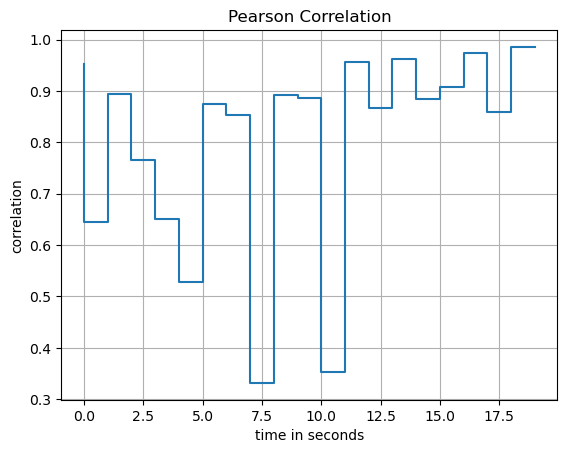

Average: 0.8012433344516564, Median: 0.8798235952873862


In [67]:
pearson_corr = st_corr(mv_, mridangam, fs, fs, type='pearson')
plt.step(np.arange(len(pearson_corr)), pearson_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Pearson Correlation')
plt.grid()
plt.show()

print('Average: {}, Median: {}'.format(np.mean(pearson_corr), np.median(pearson_corr)))

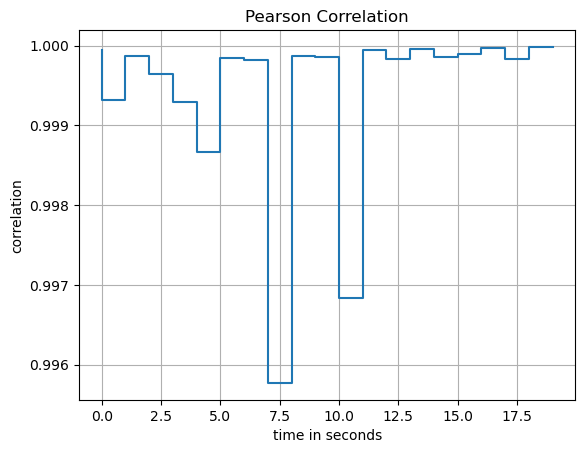

Average: 0.99940235295342, Median: 0.9998576974636983


In [68]:
pearson_corr = st_corr(ml_, mridangam, fs, fs, type='pearson')
plt.step(np.arange(len(pearson_corr)), pearson_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Pearson Correlation')
plt.grid()
plt.show()

print('Average: {}, Median: {}'.format(np.mean(pearson_corr), np.median(pearson_corr)))

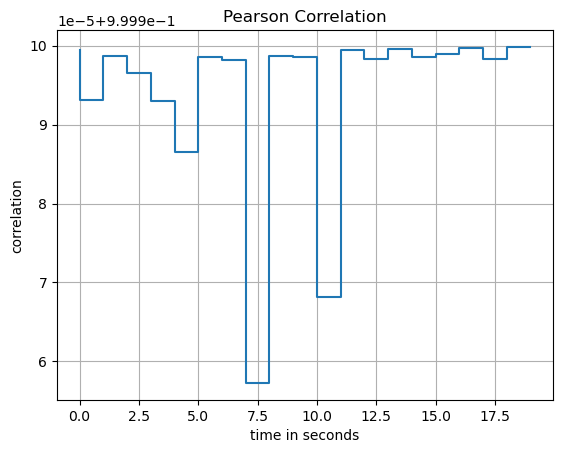

Average: 0.9999939624136939, Median: 0.9999985641353188


In [69]:
pearson_corr = st_corr(mvl_, mridangam, fs, fs, type='pearson')
plt.step(np.arange(len(pearson_corr)), pearson_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Pearson Correlation')
plt.grid()
plt.show()

print('Average: {}, Median: {}'.format(np.mean(pearson_corr), np.median(pearson_corr)))

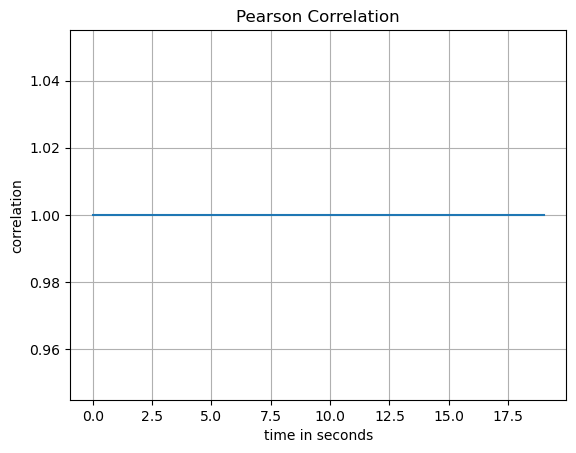

Average: 0.9999999999999998, Median: 0.9999999999999999


In [70]:
pearson_corr = st_corr(mridangam, mridangam, fs, fs, type='pearson')
plt.step(np.arange(len(pearson_corr)), pearson_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Pearson Correlation')
plt.grid()
plt.show()

print('Average: {}, Median: {}'.format(np.mean(pearson_corr), np.median(pearson_corr)))

In [71]:
# Two dissimilar songs measured

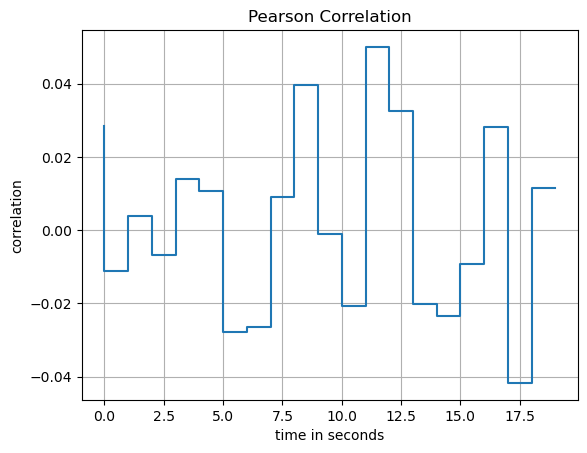

Average: 0.0019694135806706693, Median: 0.0013034826293527209


In [72]:
pearson_corr = st_corr(mridangam, violin, fs, fs, type='pearson')
plt.step(np.arange(len(pearson_corr)), pearson_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Pearson Correlation')
plt.grid()
plt.show()

print('Average: {}, Median: {}'.format(np.mean(pearson_corr), np.median(pearson_corr)))

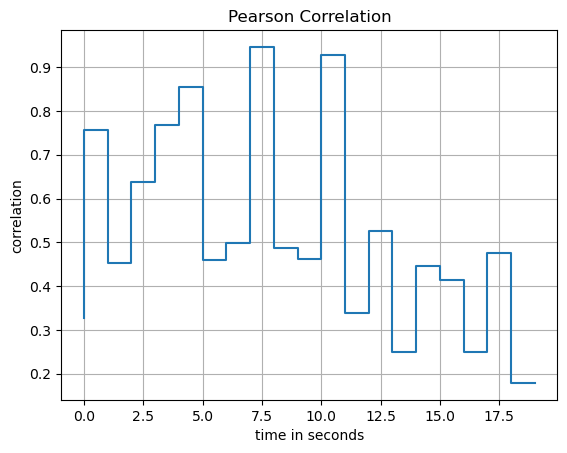

Average: 0.5230188073869066, Median: 0.46954888244831167


In [75]:
pearson_corr = st_corr(vm_, violin, fs, fs, type='pearson')
plt.step(np.arange(len(pearson_corr)), pearson_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Pearson Correlation')
plt.grid()
plt.show()

print('Average: {}, Median: {}'.format(np.mean(pearson_corr), np.median(pearson_corr)))

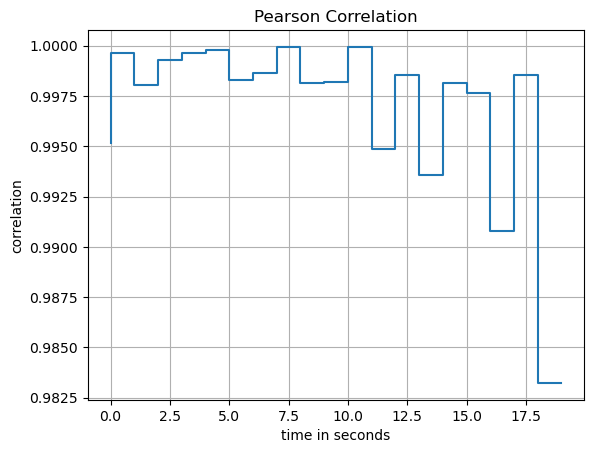

Average: 0.9970045449596034, Median: 0.998243024678678


In [76]:
pearson_corr = st_corr(vl_, violin, fs, fs, type='pearson')
plt.step(np.arange(len(pearson_corr)), pearson_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Pearson Correlation')
plt.grid()
plt.show()

print('Average: {}, Median: {}'.format(np.mean(pearson_corr), np.median(pearson_corr)))

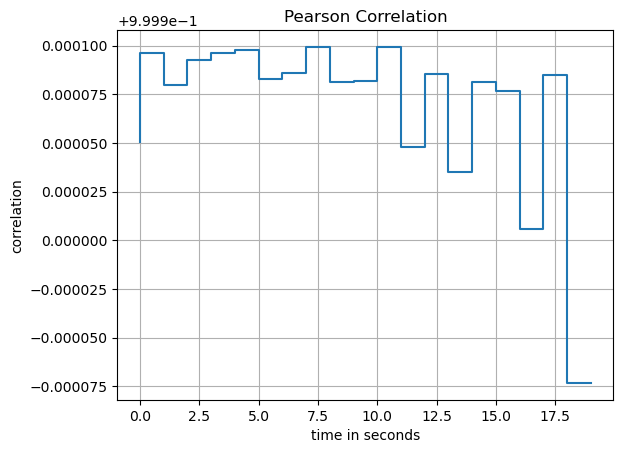

Average: 0.999969450114155, Median: 0.9999823639708774


In [77]:
pearson_corr = st_corr(vvl_, violin, fs, fs, type='pearson')
plt.step(np.arange(len(pearson_corr)), pearson_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Pearson Correlation')
plt.grid()
plt.show()

print('Average: {}, Median: {}'.format(np.mean(pearson_corr), np.median(pearson_corr)))

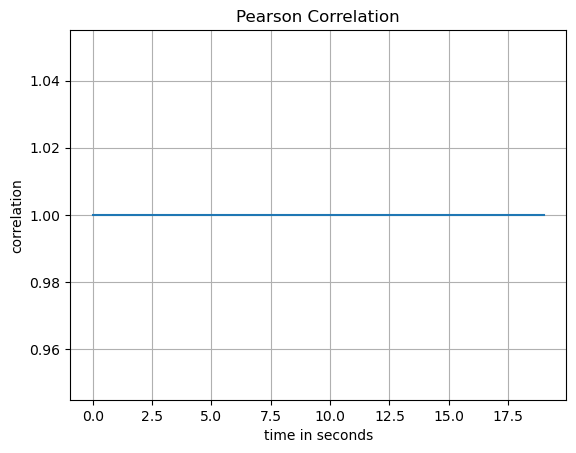

Average: 0.9999999999999998, Median: 1.0


In [78]:
pearson_corr = st_corr(violin, violin, fs, fs, type='pearson')
plt.step(np.arange(len(pearson_corr)), pearson_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Pearson Correlation')
plt.grid()
plt.show()

print('Average: {}, Median: {}'.format(np.mean(pearson_corr), np.median(pearson_corr)))

##### Plotting: Pearson (Our case w/o source)

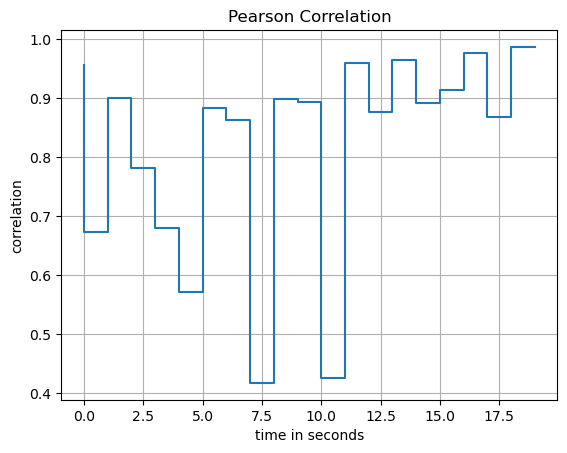

Average: 0.8190746732814851, Median: 0.8877096872207086


In [80]:
pearson_corr = st_corr(mv_, ml_, fs, fs, type='pearson')
plt.step(np.arange(len(pearson_corr)), pearson_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Pearson Correlation')
plt.grid()
plt.show()

print('Average: {}, Median: {}'.format(np.mean(pearson_corr), np.median(pearson_corr)))

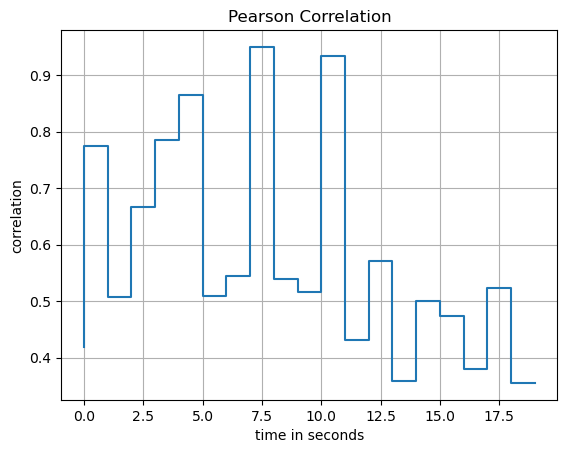

Average: 0.5800437399614811, Median: 0.5193701761752432


In [81]:
pearson_corr = st_corr(mv_, vl_, fs, fs, type='pearson')
plt.step(np.arange(len(pearson_corr)), pearson_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Pearson Correlation')
plt.grid()
plt.show()

print('Average: {}, Median: {}'.format(np.mean(pearson_corr), np.median(pearson_corr)))

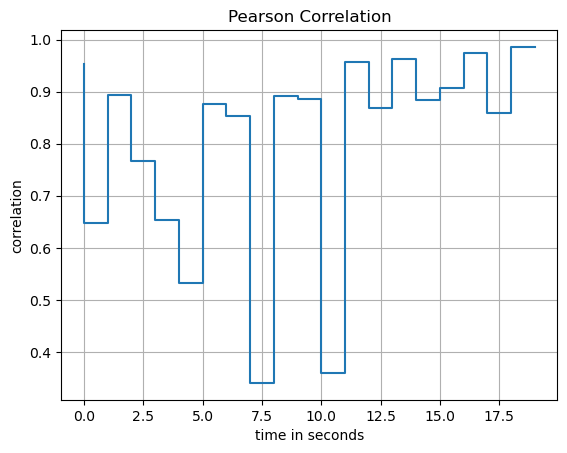

Average: 0.8030556771910051, Median: 0.8806231553341939


In [82]:
pearson_corr = st_corr(mv_, mvl_, fs, fs, type='pearson')
plt.step(np.arange(len(pearson_corr)), pearson_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Pearson Correlation')
plt.grid()
plt.show()

print('Average: {}, Median: {}'.format(np.mean(pearson_corr), np.median(pearson_corr)))

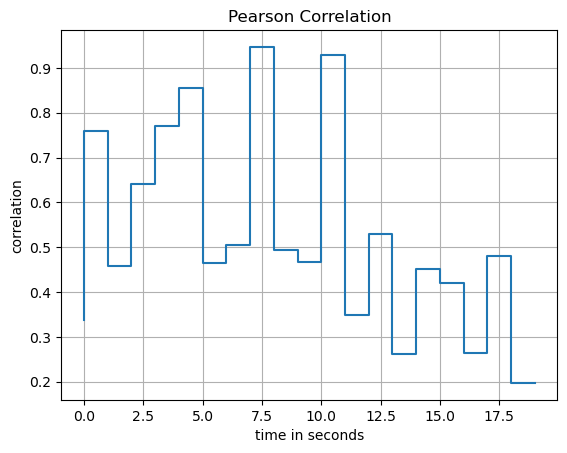

Average: 0.5288497872198992, Median: 0.4746097987418124


In [84]:
pearson_corr = st_corr(mv_, vvl_, fs, fs, type='pearson')
plt.step(np.arange(len(pearson_corr)), pearson_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Pearson Correlation')
plt.grid()
plt.show()

print('Average: {}, Median: {}'.format(np.mean(pearson_corr), np.median(pearson_corr)))

##### Working? Check?

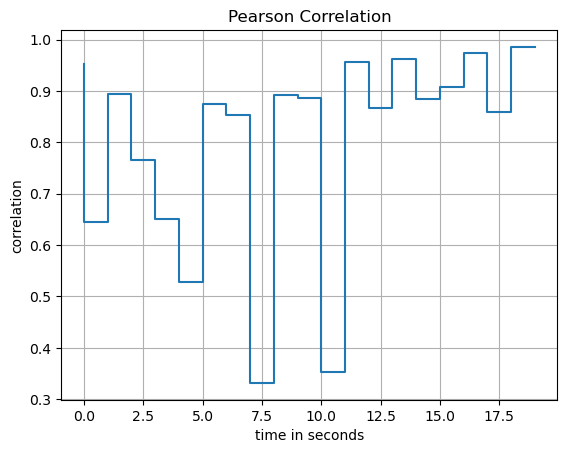

Average: 0.8012433344516564, Median: 0.8798235952873862


In [88]:
pearson_corr = st_corr(mv_, mridangam, fs, fs, type='pearson')
plt.step(np.arange(len(pearson_corr)), pearson_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Pearson Correlation')
plt.grid()
plt.show()

print('Average: {}, Median: {}'.format(np.mean(pearson_corr), np.median(pearson_corr)))

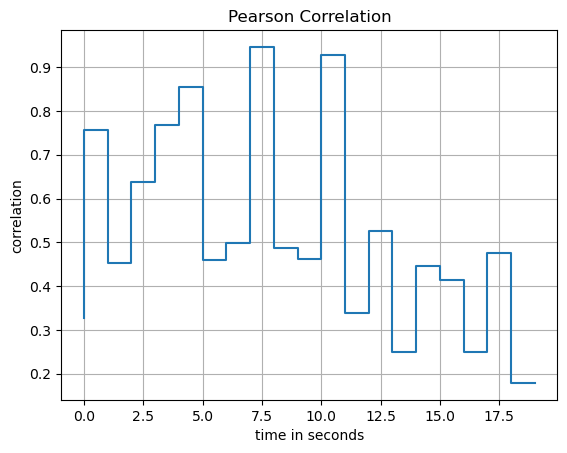

Average: 0.5230188073869066, Median: 0.46954888244831167


In [89]:
pearson_corr = st_corr(vm_, violin, fs, fs, type='pearson')
plt.step(np.arange(len(pearson_corr)), pearson_corr)
plt.xlabel('time in seconds')
plt.ylabel('correlation')
plt.title('Pearson Correlation')
plt.grid()
plt.show()

print('Average: {}, Median: {}'.format(np.mean(pearson_corr), np.median(pearson_corr)))